In [50]:
from matplotlib import pyplot as plt
import numpy as np

In [51]:
import time

In [52]:
train_config ={
    'dataset': './dataset/bin_22050_32/',
    'file_stats': './files_std_data_32_bits.npy',
    'duration': 5,
    'SAMPLE_RATE': 22050,
    'pretrained_model': 'resnet18',
    'pretrained': True,
    'n_classes': 264,
    'n_mels': 128,
    'hop_size': 256,
    'window_size': 2048,
    'train_batch_size': 32,
    'val_batch_size': 32,
    'optimizer': 'Adam',
    'LEARNING_RATE': 0.001,
    'classes_file': './models/classes_264.npy',
    'train_files': './train_files_22050_264_32.npy',
    'val_files': './val_files_22050_264_32.npy',
    'N_samples_train': 2,
    'N_samples_val': 4,
    'f1_kaggle': '',
    'last_training_state': '',
    'best_model': './models/model_mel_v2_128_32_264_0.00971.pth',
    'init_fourier': True,
    'init_mel': True,
    'train_fourier': False,
    'train_mel': True,
    'train_add_noise': True,
    'train_add_ambient_noise': True,
    'val_add_noise': False,
    'val_add_ambient_noise': False,
    'bytes_per_sample': 4,
    'results': {
        'losses': losses, 
        'val_losses': val_losses,
        'f1_score': F1s,
        'val_f1_score': val_F1s
    }
}

In [53]:
# np.save('./training_configs/train_config_mel_128.npy', train_config)

In [84]:
log = """1/25 - 1067/1067 - loss: 0.022831806913018227, F1 micro: 0.014119893312454224, acc: 0.008716421201825142, elapesed_time: 0:14:25.420259
506/506 - val loss: 0.018711496144533157, val F1 micro: 0.08432941883802414 val acc: 0.047504324465990067
Best model saved
--------------------------------------------------------------------------
2/25 - 1067/1067 - loss: 0.015345249325037003, F1 micro: 0.15745952725410461, acc: 0.09062442183494568, elapesed_time: 0:14:36.093310
506/506 - val loss: 0.014469637535512447, val F1 micro: 0.30973973870277405 val acc: 0.20990857481956482
Best model saved
--------------------------------------------------------------------------
3/25 - 1067/1067 - loss: 0.012411179952323437, F1 micro: 0.34637027978897095, acc: 0.2289096862077713, elapesed_time: 0:15:01.666088
506/506 - val loss: 0.012423409149050713, val F1 micro: 0.42698925733566284 val acc: 0.30961206555366516
Best model saved
--------------------------------------------------------------------------
4/25 - 1067/1067 - loss: 0.010499502532184124, F1 micro: 0.4726158082485199, acc: 0.34156468510627747, elapesed_time: 0:18:05.090276
506/506 - val loss: 0.011634659953415394, val F1 micro: 0.5164479613304138 val acc: 0.40974795818328865
Best model saved
--------------------------------------------------------------------------
5/25 - 1067/1067 - loss: 0.009011005982756615, F1 micro: 0.566084086894989, acc: 0.4356328248977661, elapesed_time: 0:17:02.610809
506/506 - val loss: 0.011269857175648212, val F1 micro: 0.5440390706062317 val acc: 0.44032615423202515
Best model saved
--------------------------------------------------------------------------
6/25 - 1067/1067 - loss: 0.007855955511331558, F1 micro: 0.6312642097473145, acc: 0.5071911215782166, elapesed_time: 0:15:16.514283
506/506 - val loss: 0.010248980484902859, val F1 micro: 0.6063041090965271 val acc: 0.51272547245025633
Best model saved
--------------------------------------------------------------------------
7/25 - 1067/1067 - loss: 0.007032143417745829, F1 micro: 0.674715518951416, acc: 0.5584198236465454, elapesed_time: 0:15:11.774973
506/506 - val loss: 0.010113174095749855, val F1 micro: 0.6419212818145752 val acc: 0.5614035129547119
Best model saved
--------------------------------------------------------------------------
8/25 - 1067/1067 - loss: 0.0062099783681333065, F1 micro: 0.7161003947257996, acc: 0.6073853373527527, elapesed_time: 0:14:50.415113
506/506 - val loss: 0.00996340811252594, val F1 micro: 0.6441168189048767 val acc: 0.56405979394912723
Best model saved
--------------------------------------------------------------------------
9/25 - 1067/1067 - loss: 0.00563435722142458, F1 micro: 0.7439411282539368, acc: 0.6438271403312683, elapesed_time: 0:14:56.221017
506/506 - val loss: 0.010679434984922409, val F1 micro: 0.6374678611755371 val acc: 0.5673338174819946
--------------------------------------------------------------------------
10/25 - 1067/1067 - loss: 0.005070745013654232, F1 micro: 0.7731228470802307, acc: 0.6805620193481445, elapesed_time: 0:14:44.198086
506/506 - val loss: 0.010109618306159973, val F1 micro: 0.6526055335998535 val acc: 0.5705460906028748
--------------------------------------------------------------------------
11/25 - 1067/1067 - loss: 0.004649771377444267, F1 micro: 0.7927529215812683, acc: 0.7062234282493591, elapesed_time: 0:14:42.267667
506/506 - val loss: 0.009586895816028118, val F1 micro: 0.6749849915504456 val acc: 0.5898196101188666
Best model saved"""

In [133]:
log = """1/25 - 1067/1067 - loss: 0.022047916427254677, F1 micro: 0.021537525579333305, acc: 0.013186472468078136, elapesed_time: 0:14:12.154775
506/506 - val loss: 0.018145890906453133, val F1 micro: 0.11790761351585388 val acc: 0.06906350702047348
Best model saved
--------------------------------------------------------------------------
2/25 - 1067/1067 - loss: 0.014706430025398731, F1 micro: 0.20146137475967407, acc: 0.11968991905450821, elapesed_time: 0:14:40.817191
506/506 - val loss: 0.014099779538810253, val F1 micro: 0.33235105872154236 val acc: 0.22294291853904724
Best model saved
--------------------------------------------------------------------------
3/25 - 1067/1067 - loss: 0.011843995191156864, F1 micro: 0.38495272397994995, acc: 0.26124560832977295, elapesed_time: 0:15:09.181352
506/506 - val loss: 0.012544771656394005, val F1 micro: 0.4600420892238617 val acc: 0.357919454574584965
Best model saved
--------------------------------------------------------------------------
4/25 - 1067/1067 - loss: 0.009873837232589722, F1 micro: 0.5131165981292725, acc: 0.3801729679107666, elapesed_time: 0:14:59.692620
506/506 - val loss: 0.01136916596442461, val F1 micro: 0.5425862669944763 val acc: 0.441932290792465256
Best model saved
--------------------------------------------------------------------------
5/25 - 1067/1067 - loss: 0.008501186035573483, F1 micro: 0.5907841920852661, acc: 0.46309036016464233, elapesed_time: 0:14:33.610165
506/506 - val loss: 0.010738897137343884, val F1 micro: 0.5825178027153015 val acc: 0.48906597495079043
Best model saved
--------------------------------------------------------------------------
6/25 - 1067/1067 - loss: 0.007413176819682121, F1 micro: 0.6536444425582886, acc: 0.533349871635437, elapesed_time: 0:14:33.418253
506/506 - val loss: 0.010133445262908936, val F1 micro: 0.6163727641105652 val acc: 0.5246478915214539
Best model saved
--------------------------------------------------------------------------
7/25 - 1067/1067 - loss: 0.006574913393706083, F1 micro: 0.6994011998176575, acc: 0.5866323709487915, elapesed_time: 0:14:32.348785
506/506 - val loss: 0.00962480902671814, val F1 micro: 0.6463436484336853 val acc: 0.55992090702056886
Best model saved
--------------------------------------------------------------------------
8/25 - 1067/1067 - loss: 0.005869969725608826, F1 micro: 0.7331840991973877, acc: 0.6296744346618652, elapesed_time: 0:15:06.250658
506/506 - val loss: 0.009751114062964916, val F1 micro: 0.6597619652748108 val acc: 0.5804299712181091
--------------------------------------------------------------------------
9/25 - 1067/1067 - loss: 0.00526386359706521, F1 micro: 0.7629493474960327, acc: 0.668257474899292, elapesed_time: 0:15:21.732883
506/506 - val loss: 0.010172947309911251, val F1 micro: 0.6565150022506714 val acc: 0.5739436745643616
--------------------------------------------------------------------------
10/25 - 1067/1067 - loss: 0.004816800821572542, F1 micro: 0.7862970232963562, acc: 0.6980459094047546, elapesed_time: 0:14:43.654276
506/506 - val loss: 0.009553533047437668, val F1 micro: 0.6728172898292542 val acc: 0.5833951234817505
Best model saved
--------------------------------------------------------------------------
11/25 - 1067/1067 - loss: 0.004414479713886976, F1 micro: 0.8046119809150696, acc: 0.7223479151725769, elapesed_time: 0:14:52.985419
506/506 - val loss: 0.009499672800302505, val F1 micro: 0.6868316531181335 val acc: 0.6129849553108215
Best model saved
--------------------------------------------------------------------------
12/25 - 1067/1067 - loss: 0.004041519947350025, F1 micro: 0.823971152305603, acc: 0.748526930809021, elapesed_time: 0:14:45.067838
506/506 - val loss: 0.009585155174136162, val F1 micro: 0.6908524632453918 val acc: 0.6170002222061157
--------------------------------------------------------------------------
13/25 - 1067/1067 - loss: 0.0038586980663239956, F1 micro: 0.831956684589386, acc: 0.7621173858642578, elapesed_time: 0:15:27.379503
506/506 - val loss: 0.010264569893479347, val F1 micro: 0.6855803728103638 val acc: 0.6053249239921572
--------------------------------------------------------------------------
14/25 - 1067/1067 - loss: 0.0034953299909830093, F1 micro: 0.8480297923088074, acc: 0.7830578088760376, elapesed_time: 0:17:02.268432
506/506 - val loss: 0.009699399583041668, val F1 micro: 0.691868007183075 val acc: 0.60940200090408336
--------------------------------------------------------------------------
15/25 - 1067/1067 - loss: 0.0032794747967272997, F1 micro: 0.8570283055305481, acc: 0.7950888276100159, elapesed_time: 0:14:38.333115
506/506 - val loss: 0.010340082459151745, val F1 micro: 0.6944319009780884 val acc: 0.6159501075744629
--------------------------------------------------------------------------
16/25 - 1067/1067 - loss: 0.0031475697178393602, F1 micro: 0.8645791411399841, acc: 0.8062615990638733, elapesed_time: 0:14:53.441424
506/506 - val loss: 0.010758128017187119, val F1 micro: 0.6861313581466675 val acc: 0.6126142740249634
--------------------------------------------------------------------------
17/25 - 1067/1067 - loss: 0.003049807855859399, F1 micro: 0.8701425790786743, acc: 0.8148664832115173, elapesed_time: 0:14:54.910509
506/506 - val loss: 0.010066806338727474, val F1 micro: 0.703215479850769 val acc: 0.62280702590942386
--------------------------------------------------------------------------
18/25 - 1067/1067 - loss: 0.0027831518091261387, F1 micro: 0.880230724811554, acc: 0.8280823826789856, elapesed_time: 0:14:39.438539
506/506 - val loss: 0.010292897932231426, val F1 micro: 0.7071266174316406 val acc: 0.6236718297004724
--------------------------------------------------------------------------
19/25 - 1067/1067 - loss: 0.002656476106494665, F1 micro: 0.8863378763198853, acc: 0.8362255692481995, elapesed_time: 0:14:39.045738
506/506 - val loss: 0.010455140843987465, val F1 micro: 0.702616810798645 val acc: 0.62781071662902832"""

In [138]:
train_configs = [
    np.load('./training_configs/train_config_1595114772.npy', allow_pickle=True).item(),
    np.load('./training_configs/train_config_1595172716_mel_no_train.npy', allow_pickle=True).item(),
    np.load('./training_configs/train_config_mel_128.npy', allow_pickle=True).item(),
    np.load('./training_configs/train_config_mel_128_BW.npy', allow_pickle=True).item(),
    np.load('./training_configs/train_config_mel_128_BW_a.npy', allow_pickle=True).item()
]

In [135]:
# train_configs[0]

In [139]:
def get_losses_from_log(log):
    losses = []
    F1s = []
    val_losses = []
    val_F1s = []
    for line in log.split('--------------------------------------------------------------------------'):
        splited = line.split(' ')
        print(splited)
        losses.append(float(splited[5].replace(',', '')))
        F1s.append(float(splited[8].replace(',', '')))
        val_losses.append(float(splited[16].replace(',', '')))
        val_F1s.append(float(splited[20].replace(',', '')))
    return losses, F1s, val_losses, val_F1s
# losses, F1s, val_losses, val_F1s = get_losses_from_log(log)
# train_configs.append({
#     'results': {
#         'losses': losses, 
#         'val_losses': val_losses,
#         'f1_score': F1s,
#         'val_f1_score': val_F1s
#     }
# })

16 0.5803314447402954 0.010966368950903416
14 0.6796473860740662 0.009430751204490662
13 0.6778061389923096 0.009708205237984657
10 0.6749849915504456 0.009586895816028118
10 0.6868316531181335 0.009499672800302505


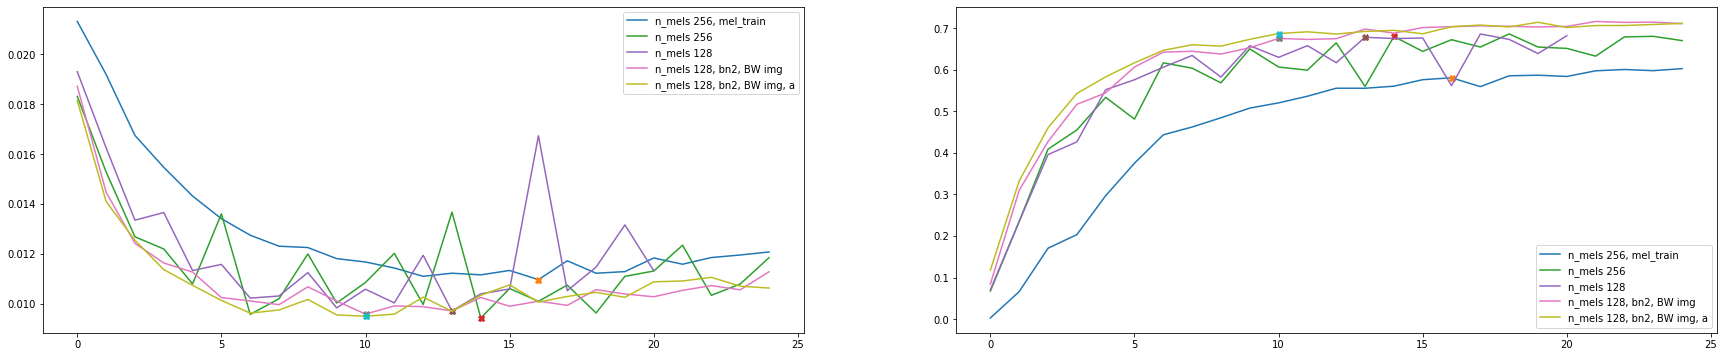

In [140]:
descriptions = [
    "n_mels 256, mel_train",
    "n_mels 256",
    "n_mels 128",
    "n_mels 128, bn2, BW img",
    "n_mels 128, bn2, BW img, a"
]
f, ax = plt.subplots(1, 2, figsize=(30, 6))
for i, train_config in enumerate(train_configs):
    losses = train_config['results']['losses']
    F1s = train_config['results']['f1_score']
    val_losses = train_config['results']['val_losses']
    val_F1s = train_config['results']['val_f1_score']
    min_idx = np.argmin(val_losses)
    print(min_idx, val_F1s[min_idx], val_losses[min_idx])
#     ax[0].plot(losses)
    ax[0].plot(val_losses, label=descriptions[i])
    ax[0].plot(min_idx, val_losses[min_idx], marker='X')
#     ax[1].plot(F1s)
    ax[1].plot(val_F1s, label=descriptions[i])
    ax[1].plot(min_idx, val_F1s[min_idx], marker='X')
ax[0].legend()
ax[1].legend()

In [95]:
# train_config['results']['losses'] = losses
# train_config['results']['val_losses'] = val_losses
# train_config['results']['f1_score'] = F1s
# train_config['results']['val_f1_score'] = val_F1s
# train_config

In [96]:
print(list(zip(val_F1s, val_losses)))

[(0.08432941883802414, 0.018711496144533157), (0.30973973870277405, 0.014469637535512447), (0.42698925733566284, 0.012423409149050713), (0.5164479613304138, 0.011634659953415394), (0.5440390706062317, 0.011269857175648212), (0.6063041090965271, 0.010248980484902859), (0.6419212818145752, 0.010113174095749855), (0.6441168189048767, 0.00996340811252594), (0.6374678611755371, 0.010679434984922409), (0.6526055335998535, 0.010109618306159973), (0.6749849915504456, 0.009586895816028118), (0.6726117730140686, 0.009913891553878784), (0.6743889451026917, 0.009882904589176178), (0.6976470351219177, 0.009714868851006031), (0.6877669095993042, 0.01025414653122425), (0.7011347413063049, 0.009899614378809929), (0.7032340168952942, 0.010103544220328331), (0.7052236199378967, 0.009937161579728127), (0.7042282223701477, 0.01056563388556242), (0.7025007605552673, 0.01039181835949421), (0.7038944959640503, 0.01028059609234333), (0.7158026099205017, 0.01053826604038477), (0.7135710120201111, 0.01072520297

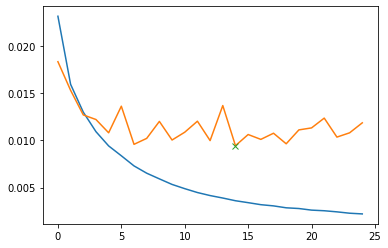

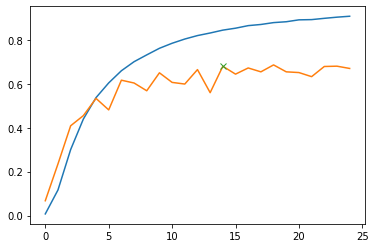